## Benchmark comparing sklearn and GPU TSNE

GPU TSNE source:  https://github.com/georgedimitriadis/t_sne_bhcuda

Sklearn TSNE: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [1]:
import t_sne_bhcuda.t_sne_bhcuda.bhtsne_cuda as tsne_bhcuda
import numpy as np
import os
from utils import plot_tsne
import sklearn

print("Sklearn version: {}".format(sklearn.__version__))
print("Numpy version: {}".format(np.__version__))

Sklearn version: 0.19.1
Numpy version: 1.14.5


In [2]:
perplexity = 10.0
theta = 0.5
learning_rate = 200.0
iterations = 2000
gpu_mem = 0.8
files_dir='tsne_results'

In [3]:
data_for_tsne = np.random.rand(1000, 1000) # type: numpy.float64

#### TSNE with GPU

In [4]:
%%time
t_sne_result_gpu = tsne_bhcuda.t_sne(samples=data_for_tsne, use_scikit=False, files_dir=files_dir,
                        no_dims=2, perplexity=perplexity, eta=learning_rate, theta=theta,
                        iterations=iterations, gpu_mem=gpu_mem, randseed=-1, verbose=2)


Read the 1000 x 1000 data matrix successfully!
Using current time as random seed...
Using no_dims = 2, perplexity = 10.000000, learning rate = 200.000000, and theta = 0.500000
Computing input similarities...

Device Name = Tesla K80
multiProcessorCount: 13
totalGlobalMem (in MB): 11441.187500
totalGlobalMem (in GB): 11.173035
sharedMemPerBlock (in bytes): 49152
Maximum number of threads per block: 1024
Maximum size of each dimension of a block: 1024 x 1024 x 64
Maximum sizes of each dimension of a grid: 2147483647 x 65535 x 65535
Compute capability of the device = 3.7
canMapHostMemory: TRUE
deviceOverlap: TRUE
GPU memory usage: used = 71.000000 MB, free = 11370.187500 MB, total = 11441.187500 MB

GPU iteration = 0, distance elements calculated = 1000000
GPU memory usage: used = 82.625000 MB, free = 11358.562500 MB, total = 11441.187500 MB
Time spent in calculating all distances in GPU: 0.298834
Building tree...
 - Building tree and finding perplexities, point 0 of 1000
Time spent build

(1000, 2)


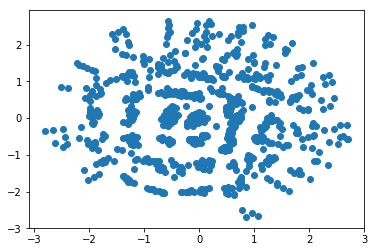

In [5]:
print(t_sne_result_gpu.shape)
plot_tsne(t_sne_result_gpu)

#### TSNE Sklearn

In [6]:
%%time
t_sne_result_sklearn = tsne_bhcuda.t_sne(samples=data_for_tsne, use_scikit=True, files_dir=files_dir,
                        no_dims=2, perplexity=perplexity, eta=learning_rate, theta=theta,
                        iterations=iterations, gpu_mem=gpu_mem, randseed=-1, verbose=2)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.014s...
[t-SNE] Computed neighbors for 1000 samples in 1.719s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.281465
[t-SNE] Computed conditional probabilities in 0.246s
[t-SNE] Iteration 50: error = 22.9653931, gradient norm = 0.0879670 (50 iterations in 0.799s)
[t-SNE] Iteration 100: error = 22.9979153, gradient norm = 0.0761279 (50 iterations in 0.828s)
[t-SNE] Iteration 150: error = 22.9748974, gradient norm = 0.1040474 (50 iterations in 0.847s)
[t-SNE] Iteration 200: error = 23.1668148, gradient norm = 0.0860164 (50 iterations in 0.824s)
[t-SNE] Iteration 250: error = 23.5420952, gradient norm = 0.0665374 (50 iterations in 0.845s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 23.542095
[t-SNE] Iteration 300: error = 3.1524441, gradient norm = 0.0022424 (50 iterations in 0.644s)
[t-SNE] Iteration 350: error = 2.9878078, gradient norm = 0.00068

(1000, 2)


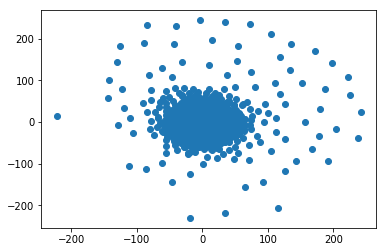

In [7]:
print(t_sne_result_sklearn.shape)
plot_tsne(t_sne_result_sklearn)